### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
dataset = pd.read_csv('1.csv', delimiter=';')
print(dataset)
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

     1376319196.1333334  35.88944444444442  6.575554251670838  \
0          1.376328e+09           0.572778           0.015556   
1          1.376337e+09           0.608333           0.017778   
2          1.376346e+09           0.571667           0.000000   
3          1.376355e+09           0.592778           0.128889   
4          1.376364e+09           0.590000           0.064444   
..                  ...                ...                ...   
271        1.378769e+09           2.529444           0.511111   
272        1.378778e+09           0.673333           0.071111   
273        1.378787e+09           0.657222           0.015556   
274        1.378796e+09          25.768889           3.397777   
275        1.378805e+09          10.452222           4.322222   

     0.8644444444444446  4352.604444444442  78.11555555555556  \
0              0.000000           1.413333           0.002222   
1              5.466667           2.428889           0.004444   
2              0.000000 

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

### Standarising the dataset

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 1.48488297 -0.22304544 -0.24770266 ... -0.23185128 -0.21396495
  -0.16556338]
 [ 1.16085964 -0.21897759 -0.23235043 ... -0.23149346 -0.21396495
  -0.16556338]
 [-1.32166167 -0.22245081 -0.21699821 ... -0.2324836  -0.21387046
  -0.16541055]
 ...
 [-0.41105471 -0.22566725 -0.23235043 ... -0.2325234  -0.21387046
  -0.16541055]
 [ 1.63443232  7.3319761   6.22326426 ... -0.23183331 -0.21396495
  -0.16556338]
 [-0.46090368 -0.22363332 -0.23235043 ... -0.23231834 -0.21387046
  -0.16541055]]
[[-1.35904781 -0.22214153 -0.23422025 ... -0.23146569 -0.21396495
  -0.1643408 ]
 [-0.18590248 -0.22552535 -0.25793747 ... -0.2324934  -0.21396495
  -0.16556338]
 [ 0.71221072 -0.2217886  -0.23618849 ... -0.23221074 -0.2139177
  -0.16556338]
 ...
 [-1.5459832   7.60149494  9.25789033 ... -0.23246073 -0.2139177
  -0.16541055]
 [ 0.23864376 -0.22524154 -0.25409942 ... -0.23249224 -0.21396495
  -0.16556338]
 [-1.60829453  7.60828934  9.53925657 ... -0.23197056 -0.21396495
  -0.16525773]]
[9. 2. 2. 2. 2. 2.

### Model using BaggingClassifier

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
bg = BaggingClassifier(base_estimator=cart,random_state=42)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [6]:
y_pred = bg.predict(x_test)
print(y_pred)
print(y_test)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 8. 2. 2. 8. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 9. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 6. 2. 2. 9. 2. 2. 2. 2. 4. 2. 2.
 7. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 5. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 2. 2. 2. 2. 2. 2. 2. 2.]


[[50  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0]]
0.8928571428571429


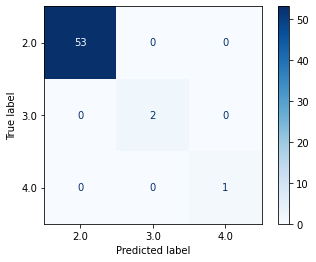

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
acc1 = accuracy_score(y_test,y_pred)
print(acc1)
plot_confusion_matrix(bg,x_test,y_pred,cmap=plt.cm.Blues)
plt.show()

### Model using AdaBoostClassifier

In [8]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = 42)
abc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [9]:
y_predi = abc.predict(x_test)
print(y_predi)
print(y_test)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 5. 2. 2. 7. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 7. 2. 2. 2. 2. 2. 2. 2. 5. 8.
 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 6. 2. 2. 9. 2. 2. 2. 2. 4. 2. 2.
 7. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 5. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 2. 2. 2. 2. 2. 2. 2. 2.]


[[48  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]]
0.8571428571428571


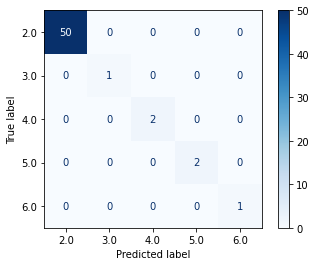

In [10]:
cm = confusion_matrix(y_test,y_predi)
print(cm)
acc2 = accuracy_score(y_test,y_predi)
print(acc2)
plot_confusion_matrix(abc,x_test,y_predi,cmap=plt.cm.Blues)
plt.show()

### Model using Gradient Boosting Classifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
y_predic = gbc.predict(x_test)
print(y_predic)
print(y_test)

[2. 2. 2. 2. 2. 5. 2. 2. 2. 2. 2. 2. 3. 9. 2. 2. 7. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 7. 7. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 6. 2. 2. 9. 2. 2. 2. 2. 4. 2. 2.
 7. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 5. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 2. 2. 2. 2. 2. 2. 2. 2.]


[[47  1  0  1  0  1  0]
 [ 1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0]]
0.8392857142857143


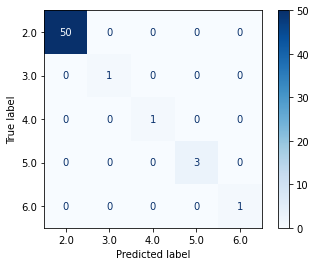

In [13]:
cm = confusion_matrix(y_test,y_predic)
print(cm)
acc3 = accuracy_score(y_test,y_predic)
print(acc3)
plot_confusion_matrix(gbc,x_test,y_predic,cmap=plt.cm.Blues)
plt.show()

### Model Using Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfg = RandomForestClassifier()
rfg.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
y_predict = rfg.predict(x_test)
print(y_predict)
print(y_test)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 5. 2. 2. 9. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 5. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 6. 2. 2. 9. 2. 2. 2. 2. 4. 2. 2.
 7. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 5. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 2. 2. 2. 2. 2. 2. 2. 2.]


[[50  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]]
0.9285714285714286


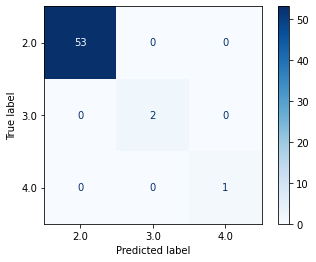

In [16]:
cm = confusion_matrix(y_test,y_predict)
print(cm)
acc4 = accuracy_score(y_test,y_predict)
print(acc4)
plot_confusion_matrix(rfg,x_test,y_predict,cmap=plt.cm.Blues)
plt.show()

### Model Using MPL Classifier

In [17]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(x_train,y_train)

c:\users\91946\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
y_pre = classifier.predict(x_test)
print(y_pre)
print(y_test)

[2. 2. 2. 2. 2. 5. 2. 2. 2. 2. 2. 2. 2. 9. 2. 2. 9. 2. 2. 2. 2. 2. 2. 2.
 9. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 7. 7. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 9.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 6. 2. 2. 9. 2. 2. 2. 2. 4. 2. 2.
 7. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 5. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 2. 2. 2. 2. 2. 2. 2. 2.]


[[47  0  0  1  0  1  1]
 [ 1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1]]
0.8571428571428571


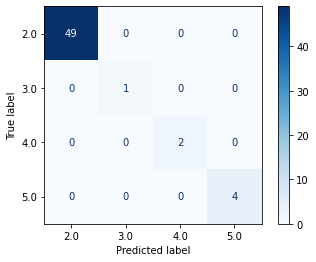

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_test,y_pre)
print(cm)
acc5 = accuracy_score(y_test,y_pre)
print(acc5)
plot_confusion_matrix(classifier,x_test,y_pre,cmap=plt.cm.Blues)
plt.show()

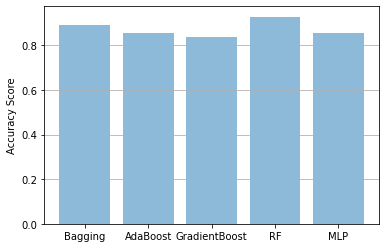

In [20]:
labels = ['Bagging', 'AdaBoost', 'GradientBoost', 'RF','MLP']
x_pos = np.arange(len(labels))
sizes = [acc1, acc2, acc3, acc4, acc5]

fig, ax = plt.subplots()

ax.bar(x_pos, sizes, align='center', alpha=0.5)
ax.set_ylabel('Accuracy Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

